In [75]:
#Q1

In [3]:
import pandas as pd
df = pd.read_csv("salary.csv")

In [4]:
X = df.iloc[:,:-1].values

In [5]:
y = df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/3,random_state = 0)

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
pred = regressor.predict(X_test)
pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

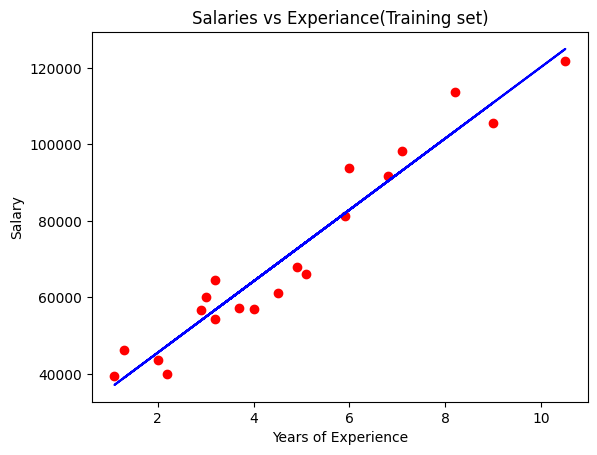

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title("Salaries vs Experiance(Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

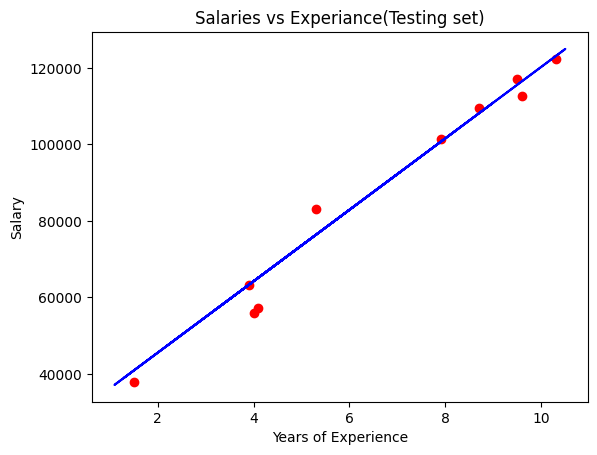

In [22]:
plt.scatter(X_test,y_test,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title("Salaries vs Experiance(Testing set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [26]:
import numpy as np
new_salary_pred = regressor.predict(np.array([15]).reshape(-1, 1))
print("Predicted salary of a person with 15 years of experience - ",new_salary_pred)

Predicted salary of a person with 15 years of experience -  [167005.32889087]


In [28]:
print("Intercept .... Fresher salary",regressor.intercept_)
print("Coefficient .... Additional salary for each additional year of experience - ",regressor.coef_)

Intercept .... Fresher salary 26816.19224403119
Coefficient .... Additional salary for each additional year of experience -  [9345.94244312]


In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test,pred)
MSE = mean_squared_error(y_test,pred)
RMSE = np.sqrt(MSE)
print("mean_absolute_error - ",MAE)
print("mean_squared_error - ",MSE)
print("Root_mean_squared_error - ",RMSE)

mean_absolute_error -  3426.4269374307123
mean_squared_error -  21026037.329511296
Root_mean_squared_error -  4585.4157204675885


In [76]:
#Q2

In [34]:
df = pd.read_csv("diabetes.csv")
X = df.drop("Outcome",axis=1)
y = df["Outcome"]
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [37]:
pred = classifier.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [38]:
comparison = pd.DataFrame({'Actual':y_test,'Predicted':pred})
comparison[0:10]

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
472,0,0
233,0,0
385,0,0
556,0,0
59,0,0


In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,pred)

0.7835497835497836

In [40]:
y_train_predict = classifier.predict(X_train)
accuracy_score(y_train,y_train_predict)

0.7728119180633147

In [42]:
conf_mat =  confusion_matrix(y_test,pred)
conf_mat

array([[132,  14],
       [ 36,  49]], dtype=int64)

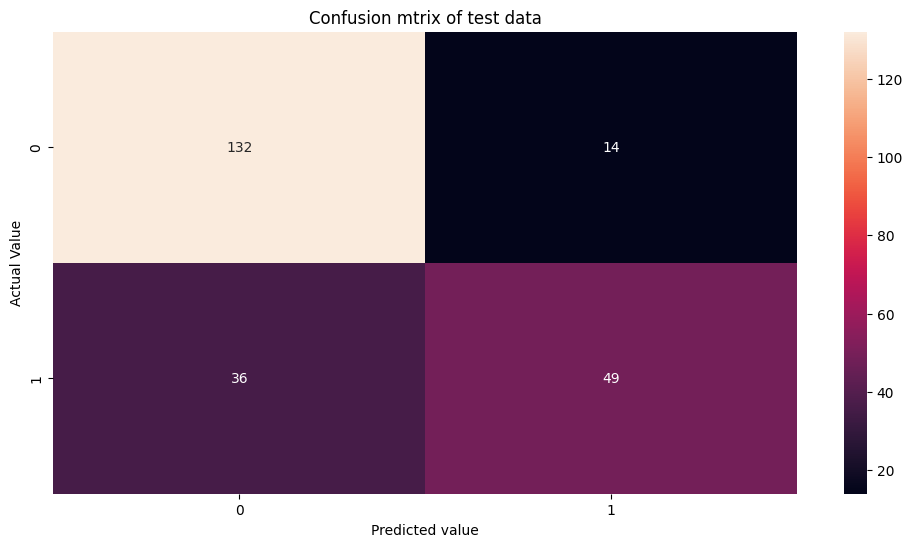

In [49]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.title("Confusion mtrix of test data")
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")
plt.show()

In [50]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.90      0.84       146\n           1       0.78      0.58      0.66        85\n\n    accuracy                           0.78       231\n   macro avg       0.78      0.74      0.75       231\nweighted avg       0.78      0.78      0.78       231\n'

In [55]:
TN = conf_mat[0,0]
TP = conf_mat[1,1]
FN = conf_mat[1,0]
FP= conf_mat[0,1]

In [57]:
recall = TP/(TP+FN)
Precision = TP/(TP+FP)
specificity = TN/(TN+FP)
accuracy =(TP+TN)/(TP+TN+FP+FN)
f1_score = 2*Precision*recall/(Precision+recall)
print("recall",recall)
print("Precision",Precision)
print("specificity",specificity)
print("accuracy",accuracy)
print("f1_score",f1_score)

recall 0.5764705882352941
Precision 0.7777777777777778
specificity 0.9041095890410958
accuracy 0.7835497835497836
f1_score 0.6621621621621621


In [77]:
#Q3

In [59]:
dataset = pd.read_csv("advertising-sales.csv")
x = dataset[["tv","radio","newspaper"]]
y = dataset["sales"]

In [61]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)

In [62]:
mlr  = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [65]:
print("Intercept", mlr.intercept_)
print("Coefficients", list(zip(x,mlr.coef_)))

Intercept 2.6527896688794996
Coefficients [('tv', 0.04542559602399794), ('radio', 0.18975772766893614), ('newspaper', 0.0046030789531119965)]


In [66]:
pred = mlr.predict(X_test)
pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

In [67]:
mlr_diff = pd.DataFrame({"Actual":y_test,"Predicted":pred})
mlr_diff

,Actual,Predicted
126,6.6,10.621601
104,20.7,20.006253
99,17.2,16.918509
92,19.4,19.170407
111,21.8,20.949741
167,12.2,13.122843
116,12.2,11.807407
96,11.7,12.320198
52,22.6,20.578068
69,22.3,20.956627


In [72]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,pred)
MSE = metrics.mean_squared_error(y_test,pred)
RMSE = np.sqrt(MSE)
print("R % :{:.2f}".format(mlr.score(x,y)*100))
print("mean_absolute_error - ",MAE)
print("mean_squared_error - ",MSE)
print("Root_mean_squared_error - ",RMSE)

R % :89.59
mean_absolute_error -  1.063848312407202
mean_squared_error -  1.8506819941636943
Root_mean_squared_error -  1.3603977338130544


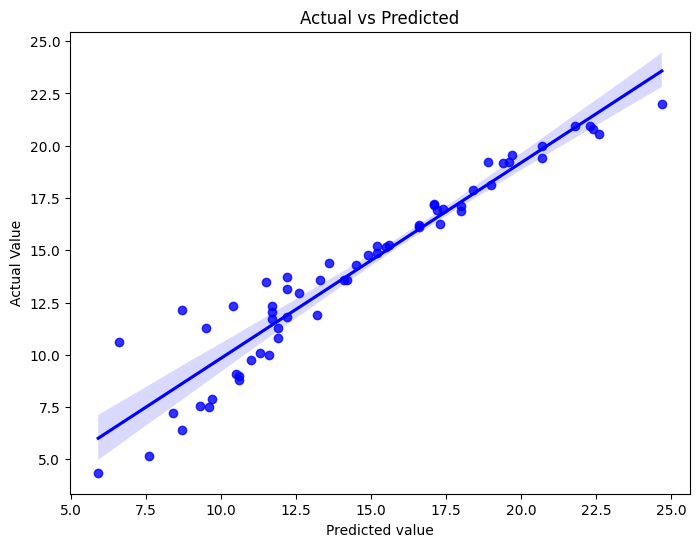

In [74]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test,y=pred,color="blue")
plt.title("Actual vs Predicted")
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")
plt.show()

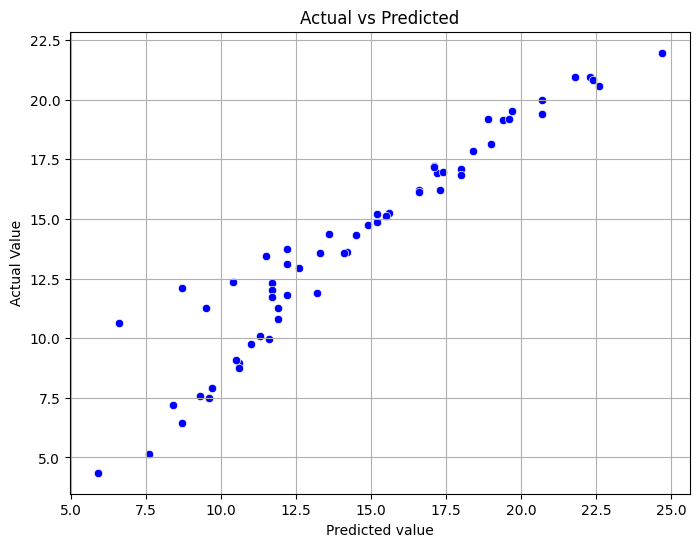

In [82]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=pred,color="blue")
plt.title("Actual vs Predicted")
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")
plt.grid(True)
plt.show()

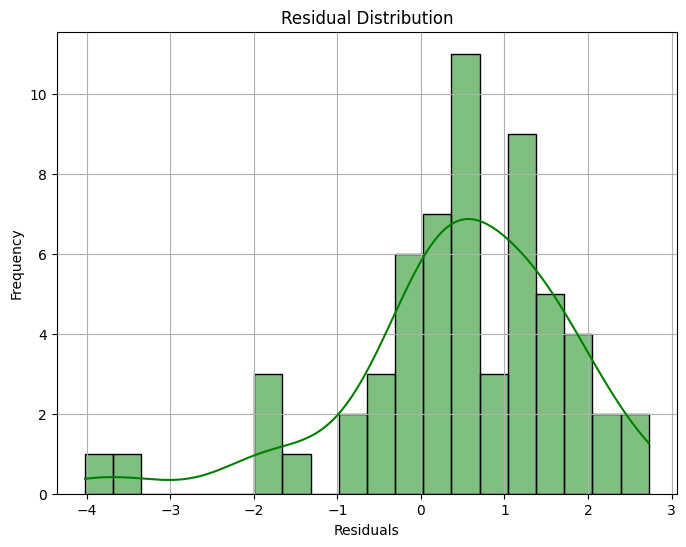

In [79]:
residuals = y_test-pred
plt.figure(figsize=(8,6))
sns.histplot(residuals,bins=20,kde = True,color="g")
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()